In [2]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install sklearn
# %pip install -U scikit-learn
# %pip install spotipy

In [74]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("tracks.csv")

# Creating the dataframe
df = pd.DataFrame(dataset)

df.tail()

id                       name  popularity  \
586667  5rgu12WBIHQtvej2MdHSH0                        云与海          50   
586668  0NuWgxEp51CutD2pJoF4OM                      blind          72   
586669  27Y1N4Q4U3EfDU5Ubw8ws2  What They'll Say About Us          70   
586670  45XJsGpFTyzbzeWK8VzR8S            A Day At A Time          58   
586671  5Ocn6dZ3BJFPWh4ylwFXtn           Mar de Emociones          38   

        duration_ms  explicit                          artists  \
586667       258267         0                      ['阿YueYue']   
586668       153293         0                   ['ROLE MODEL']   
586669       187601         0                      ['FINNEAS']   
586670       142003         0  ['Gentle Bones', 'Clara Benin']   
586671       214360         0                    ['Afrosound']   

                                               id_artists release_date  \
586667                         ['1QLBXKM5GCpyQQSVMNZqrZ']   2020-09-26   
586668                         ['1dy5WNgIKQU6ezkpZs4y8z']   2020-10-21   
586669                         ['37M5pPGs6V1fchFJSgCguX']   2020-09-02   
586670  ['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...   2021-03-05   
586671                         ['0i4Qda0k4nf7jnNHmSNpYv']   2015-07-01   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
586667         0.560   0.518    0    -7.471     0       0.0292         0.785   
586668         0.765   0.663    0    -5.223     1       0.0652         0.141   
586669         0.535   0.314    7   -12.823     0       0.0408         0.895   
586670         0.696   0.615   10    -6.212     1       0.0345         0.206   
586671         0.686   0.723    6    -7.067     1       0.0363         0.105   

        instrumentalness  liveness  valence    tempo  time_signature  
586667          0.000000    0.0648   0.2110  131.896               4  
586668          0.000297    0.0924   0.6860  150.091               4  
586669          0.000150    0.0874   0.0663  145.095               4  
586670          0.000003    0.3050   0.4380   90.029               4  
586671          0.000000    0.2640   0.9750  112.204               4

In [75]:
# Spotify API Authentication Information
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#weilin's api key
client_id = '169bbab461424df7a16d00fbdb3201ec'
client_secret = '81b94a35ce9e4ba1acf883154c7ff94b'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [76]:
df_fill_null = df.copy()

df_fill_null['name'] = df.apply(
    lambda row: sp.track(f"spotify:track:{row['id']}")['name'] if pd.isnull(row['name']) else row['name'], axis=1)
df_fill_null.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

In [77]:
df_fill_null.iloc[226336,1]

# Removing rows without song name.
df_removed = df.dropna()
df_removed.isnull().sum()
df_removed.count()
df_removed.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

In [78]:
# Converting release_date feature to datetime format, and extracting the year.
df_removed['release_date_datetime'] = pd.to_datetime(df_removed['release_date'])
df_removed["year"] = df_removed["release_date_datetime"].dt.year
df_removed.head()

C:\Users\yukwa\AppData\Local\Temp\ipykernel_29416\1839902469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed['release_date_datetime'] = pd.to_datetime(df_removed['release_date'])
C:\Users\yukwa\AppData\Local\Temp\ipykernel_29416\1839902469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed["year"] = df_removed["release_date_datetime"].dt.year


id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  mode  speechiness  acousticness  \
0   1922-02-22         0.645  0.4450  ...     1       0.4510         0.674   
1   1922-06-01         0.695  0.2630  ...     1       0.9570         0.797   
2   1922-03-21         0.434  0.1770  ...     1       0.0512         0.994   
3   1922-03-21         0.321  0.0946  ...     1       0.0504         0.995   
4         1922         0.402  0.1580  ...     0       0.0390         0.989   

   instrumentalness  liveness  valence    tempo  time_signature  \
0            0.7440     0.151    0.127  104.851               3   
1            0.0000     0.148    0.655  102.009               1   
2            0.0218     0.212    0.457  130.418               5   
3            0.9180     0.104    0.397  169.980               3   
4            0.1300     0.311    0.196  103.220               4   

   release_date_datetime  year  
0             1922-02-22  1922  
1             1922-06-01  1922  
2             1922-03-21  1922  
3             1922-03-21  1922  
4             1922-01-01  1922  

[5 rows x 22 columns]

In [79]:
# Creating a new feature that comprises of Song Name and Artist.
df_removed["song_name_artist"] = df_removed["name"] + df_removed["artists"]
df_removed.head()

C:\Users\yukwa\AppData\Local\Temp\ipykernel_29416\2664159980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed["song_name_artist"] = df_removed["name"] + df_removed["artists"]


id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  speechiness  acousticness  \
0   1922-02-22         0.645  0.4450  ...       0.4510         0.674   
1   1922-06-01         0.695  0.2630  ...       0.9570         0.797   
2   1922-03-21         0.434  0.1770  ...       0.0512         0.994   
3   1922-03-21         0.321  0.0946  ...       0.0504         0.995   
4         1922         0.402  0.1580  ...       0.0390         0.989   

   instrumentalness  liveness  valence    tempo  time_signature  \
0            0.7440     0.151    0.127  104.851               3   
1            0.0000     0.148    0.655  102.009               1   
2            0.0218     0.212    0.457  130.418               5   
3            0.9180     0.104    0.397  169.980               3   
4            0.1300     0.311    0.196  103.220               4   

   release_date_datetime  year  \
0             1922-02-22  1922   
1             1922-06-01  1922   
2             1922-03-21  1922   
3             1922-03-21  1922   
4             1922-01-01  1922   

                                    song_name_artist  
0                                       Carve['Uli']  
1  Capítulo 2.16 - Banquero Anarquista['Fernando ...  
2  Vivo para Quererte - Remasterizado['Ignacio Co...  
3   El Prisionero - Remasterizado['Ignacio Corsini']  
4                 Lady of the Evening['Dick Haymes']  

[5 rows x 23 columns]

In [80]:
# Removing all duplicate songs-artist pairs. Meaning that there won't be 2 of the same song sung by the same artist.
print(df_removed.shape)
df_removed.drop_duplicates(subset=["song_name_artist"], keep='first', inplace=True)
print(df_removed.shape)

(586601, 23)
(526609, 23)


C:\Users\yukwa\AppData\Local\Temp\ipykernel_29416\213723201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed.drop_duplicates(subset=["song_name_artist"], keep='first', inplace=True)


In [81]:
# Filter data to keep songs published 1980 and later.
df_removed = df_removed[df_removed["year"] >= 1980]
print(df_removed.shape)

(360784, 23)


# Input your data here

In [82]:
# Using Spotify API to search for a song's information based on input and adding the necessary information in a DataFrame.
input = 'Perfect'

def search_track(track_name):
    # Search for the track
    results = sp.search(q=track_name, type='track')

    # Check if the track exists
    if results['tracks']['total'] > 0:
        # Get the first track from the results
        track = results['tracks']['items'][0]
        explicit = int(track["explicit"] == True)
        print(f'Found track: {track["name"]} by {track["artists"][0]["name"]} from the album {track["album"]["name"]}.')
        track_dict = {"id": track["id"], "name": track["name"], "popularity": track["popularity"], 
                      "duration_ms": track["duration_ms"], "explicit": explicit, "artists": track["artists"][0]["name"],
                      "id_artists": track["artists"][0]["id"], "release_date": track["album"]["release_date"]}
        return track_dict
    else:
        print('Track not found')
        return None

# Creating a Single Row DataFrame for the input song.
track_result = search_track(input)
td = pd.DataFrame(track_result, index=[0])
td

Found track: Perfect by Ed Sheeran from the album ÷ (Deluxe).


id     name  popularity  duration_ms  explicit  \
0  0tgVpDi06FyKpA1z0VMD4v  Perfect          90       263400         0   

      artists              id_artists release_date  
0  Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V   2017-03-03

In [83]:
# Obtaining Feature Data from song based on its song_id from previous function and adding them to a DataFrame.
def get_audio_features(track_result):
    song_id = track_result["id"]
    results = sp.audio_features(song_id)

    if results:
        return results[0]
    else:
        print(f'No audio features found for song ID: {song_id}')
        return None

audio_features = get_audio_features(track_result)
af = pd.DataFrame(audio_features, index=[0])
# Taking out the irrevelant features.
af_formatted = af.drop(["type", "id", "uri", "track_href", "analysis_url", "duration_ms"], axis=1)
# Merging both DataFrames to sync up with the dataset's layout.
td = pd.concat([td, af_formatted], axis=1)

In [84]:
td

id     name  popularity  duration_ms  explicit  \
0  0tgVpDi06FyKpA1z0VMD4v  Perfect          90       263400         0   

      artists              id_artists release_date  danceability  energy  key  \
0  Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V   2017-03-03         0.599   0.448    8   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -6.312     1       0.0232         0.163                 0     0.106   

   valence  tempo  time_signature  
0    0.168  95.05               3

In [85]:
# Adding the Input Song to the Dataset DataFrame. Added to the very front.
new_df = pd.concat([td, df_removed], ignore_index=True)
new_df.head()

id                                              name  \
0  0tgVpDi06FyKpA1z0VMD4v                                           Perfect   
1  6catF1lDhNTjjGa2GxRQNN     You'll Never Walk Alone - Mono; 2002 Remaster   
2  6Pkt6qVikqPBt9bEQy8iTz                                A Lover's Concerto   
3  4aSw1QJIMwYSoDEgzgdCJL      Ferry Cross the Mersey - Mono; 2002 Remaster   
4  0ZMMtH875IR2TfkyC4PolD  Don't Let the Sun Catch You Crying (Main) - Mono   

   popularity  duration_ms  explicit                     artists  \
0          90       263400         0                  Ed Sheeran   
1          56       160187         0  ['Gerry & The Pacemakers']   
2          41       159560         0                ['The Toys']   
3          40       141987         0  ['Gerry & The Pacemakers']   
4          34       157093         0  ['Gerry & The Pacemakers']   

                   id_artists release_date  danceability  energy  ...  \
0      6eUKZXaKkcviH0Ku9w2n3V   2017-03-03         0.599   0.448  ...   
1  ['3UmBeGyNwr4iDWi1vTxWi8']   2008-02-11         0.484   0.265  ...   
2  ['6lH5PpuiMa5SpfjoIOlwCS']   2020-03-13         0.671   0.867  ...   
3  ['3UmBeGyNwr4iDWi1vTxWi8']   2008-02-11         0.405   0.365  ...   
4  ['3UmBeGyNwr4iDWi1vTxWi8']   2008-02-11         0.477   0.352  ...   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0232         0.163          0.000000     0.106    0.168   95.050   
1       0.0322         0.394          0.000000     0.149    0.285  113.564   
2       0.0571         0.436          0.000000     0.139    0.839  120.689   
3       0.0289         0.255          0.000005     0.163    0.588  104.536   
4       0.0300         0.406          0.000000     0.122    0.478  106.773   

   time_signature  release_date_datetime    year  \
0               3                    NaT     NaN   
1               3             2008-02-11  2008.0   
2               4             2020-03-13  2020.0   
3               4             2008-02-11  2008.0   
4               4             2008-02-11  2008.0   

                                    song_name_artist  
0                                                NaN  
1  You'll Never Walk Alone - Mono; 2002 Remaster[...  
2                     A Lover's Concerto['The Toys']  
3  Ferry Cross the Mersey - Mono; 2002 Remaster['...  
4  Don't Let the Sun Catch You Crying (Main) - Mo...  

[5 rows x 23 columns]

In [35]:
# Recalibrating the Index.
# new_df = new_df.reset_index(drop=True)
# new_df.head()

# Checking loudness values.
new_df["loudness"].describe()

count    586602.000000
mean        -10.205782
std           5.089421
min         -60.000000
25%         -12.891000
50%          -9.242000
75%          -6.481000
max           5.376000
Name: loudness, dtype: float64

In [87]:
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Feature selection, removing non-useful rows.
def processing(new_df):
    df2 = new_df.drop(['id', 'name', 'id_artists', 'release_date', 'popularity', 'mode', 
                       "release_date_datetime", "year", "song_name_artist"], axis=1)

    # Normalize numerical features
    numerical_features = ['duration_ms', 'loudness', 'tempo']
    scaler = MinMaxScaler()
    df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

    # # Convert categorical features (assuming 'explicit' is binary)
    df2['explicit'] = df['explicit'].astype(int)

    # # Create a feature matrix
    feature_matrix = df2.drop(['artists'], axis=1)

    # # Apply cosine similarity
    start = 1
    end = 1000
    arr = []

    # Returns comparison value of first song in dataset to all others in an array.
    # DataFrame can be customised before Feature Selection to change which song the subject of comparison should be.
    while end < feature_matrix['explicit'].count():
        cosine_sim = cosine_similarity(feature_matrix.iloc[start:end,:]) # Comparing bit by bit to prevent too many dimensions.
        cs_list = cosine_sim[0].tolist() # Taking only the first row a.k.a the comparison between the first song and all others.
        arr += cs_list
        start = end
        end += 1000
    print(arr)
    return arr
arr = processing(new_df)

[0.9999999999999999, 0.8973214291637341, 0.5682573119510065, 0.9678912079815621, 0.41917404683411247, 0.4148537634936024, 0.42969759575977223, 0.5757599503704048, 0.9674155944021329, 0.5699721731187813, 0.5178629212035823, 0.5168356448014605, 0.6417671488273117, 0.8478497076953954, 0.5511708186618759, 0.9925172563264241, 0.2894507610101885, 0.9640202445877334, 0.57642671716521, 0.5750659997163067, 0.5728207504607856, 0.3863001005175832, 0.2253603308128346, 0.4224365338854909, 0.5174356306169351, 0.31085286019936165, 0.4246353696750054, 0.28855881908848163, 0.8878300214217105, 0.1358421028573283, 0.6363446621541252, 0.19223843688451492, 0.42619005213248534, 0.41857386257233536, 0.8457290129534338, 0.8955128514393021, 0.8895567167072965, 0.343648960551183, 0.9652272403488533, 0.4214198500550591, 0.6366071929378555, 0.6384519696553465, 0.9904606411206887, 0.5217353608813453, 0.35684366983288685, 0.7250585647728163, 0.5083194732882049, 0.42521357683921085, 0.4248245254305149, 0.89617185787

In [88]:
def compile_suggestions(arr):
    suggestions = []
    
    # Compiling all song ids that are above the pre-determined threshold for 'like the first song'.
    for i in range(len(arr)):
        if (arr[i] * 100) > 99.99:
            suggestions.append(i)
    
    print(suggestions)
    return suggestions
suggestions = compile_suggestions(arr)

[0, 999, 1999, 2999, 3999, 4999, 5999, 6999, 7999, 8999, 9999, 10999, 11999, 12999, 13999, 14999, 15999, 16999, 17999, 18999, 19999, 20999, 21999, 22999, 23999, 24999, 25999, 26999, 27999, 28999, 29999, 30999, 31999, 32999, 33999, 34999, 35999, 36999, 37999, 38999, 39999, 40999, 41999, 42999, 43999, 44999, 45999, 46999, 47999, 48999, 49999, 50999, 51999, 52999, 53999, 54999, 55999, 56999, 57999, 58999, 59999, 60999, 61999, 62999, 63999, 64999, 65999, 66999, 67999, 68999, 69999, 70999, 71999, 72999, 73999, 74999, 75999, 76999, 77999, 78999, 79999, 80999, 81999, 82999, 83999, 84999, 85999, 86999, 87999, 88999, 89999, 90999, 91999, 92999, 93999, 94999, 95999, 96999, 97999, 98999, 99999, 100999, 101999, 102999, 103999, 104999, 105999, 106999, 107999, 108999, 109999, 110999, 111999, 112999, 113999, 114999, 115999, 116999, 117999, 118999, 119999, 120999, 121999, 122999, 123246, 123999, 124999, 125999, 126999, 127999, 128999, 129999, 130999, 131999, 132999, 133999, 134999, 135114, 135199, 135

In [91]:
# Extracting out the end result information.
def format_suggestions(suggestions):
    # first = suggestions[1]

    # Creating the new dataframe with the first matched song.
#     main = df_removed.iloc[suggestions].copy()
#     df_main = pd.DataFrame(main)
#     df_main = df_main.T
#    print(df_removed.tail())
    df_main = new_df.loc[suggestions]

    # Adding the rest of the matched songs to the dataframe.
#     for n in range (2, len(suggestions)):
#         temp = df_removed.iloc[suggestions[n],:6].copy()
#         df_temp = pd.DataFrame(temp)
#         df_temp = df_temp.T
#         df_main = pd.concat([df_main, df_temp])

#     df_main = df_main.drop(['popularity', 'duration_ms', 'explicit'], axis=1)
    return df_main

df_main = format_suggestions(suggestions)
df_main.head()

id                           name  popularity  \
0     0tgVpDi06FyKpA1z0VMD4v                        Perfect          90   
999   0esrXPJGeeXryeRbwbRb6Y  Romeo Delight - 2015 Remaster          44   
1999  0C1qzgJPJIXLugW7vKshvp     Too Daze Gone - Remastered          41   
2999  53moBl6txrkCkc6r83tOE9               Countess Bathory          41   
3999  3my6Uz9RmXcJB7yEnrth7C                    Underground          41   

      duration_ms  explicit           artists                  id_artists  \
0          263400         0        Ed Sheeran      6eUKZXaKkcviH0Ku9w2n3V   
999        259296         0     ['Van Halen']  ['2cnMpRsOVqtPMfq7YiFE6K']   
1999       244507         0  ['Billy Squier']  ['3Fz2GbraVXhcpXnoi2Oe1r']   
2999       224907         0         ['Venom']  ['5fwaejlOHVBAw1KhIPPaQe']   
3999       120373         0     ['Tom Waits']  ['7x83XhcMbOTl1UdYsPTuZM']   

     release_date  danceability  energy  ...  speechiness  acousticness  \
0      2017-03-03         0.599   0.448  ...       0.0232       0.16300   
999    1980-03-26         0.450   0.941  ...       0.0766       0.01220   
1999         1981         0.523   0.901  ...       0.0446       0.16700   
2999   1982-11-01         0.280   0.817  ...       0.0417       0.00001   
3999   1983-09-01         0.766   0.323  ...       0.0656       0.11300   

      instrumentalness  liveness  valence    tempo  time_signature  \
0             0.000000    0.1060    0.168   95.050               3   
999           0.000099    0.3570    0.150  106.521               4   
1999          0.000004    0.1660    0.930  118.406               4   
2999          0.000327    0.3920    0.221  135.698               4   
3999          0.004180    0.0936    0.765  155.957               4   

      release_date_datetime    year  \
0                       NaT     NaN   
999              1980-03-26  1980.0   
1999             1981-01-01  1981.0   
2999             1982-11-01  1982.0   
3999             1983-09-01  1983.0   

                                song_name_artist  
0                                            NaN  
999   Romeo Delight - 2015 Remaster['Van Halen']  
1999  Too Daze Gone - Remastered['Billy Squier']  
2999                   Countess Bathory['Venom']  
3999                    Underground['Tom Waits']  

[5 rows x 23 columns]

In [92]:
df_main.count() # There is one less for the last 3 features as the input song did not go through the extracted year's steps.

id                       371
name                     371
popularity               371
duration_ms              371
explicit                 371
artists                  371
id_artists               371
release_date             371
danceability             371
energy                   371
key                      371
loudness                 371
mode                     371
speechiness              371
acousticness             371
instrumentalness         371
liveness                 371
valence                  371
tempo                    371
time_signature           371
release_date_datetime    370
year                     370
song_name_artist         370
dtype: int64

In [98]:
import random

# Generating 10 of the matched songs at random.
def recommend(df_main):
    print('Here are your recommendations!')
    for c in range(10):
        recc = df_main.sample().to_dict()
        name = list(recc['name'].values())[0]
        artists = (list(recc['artists'].values())[0])[1:len(list(recc['artists'].values())[0])-1]
        print(str(c + 1) + '. ' + name + ' by ' + artists)
    
# May want to try a filter for repreventing duplicate songs in the list.
recommend(df_main) # End Product

Here are your recommendations!
1. Boldoggá Akarlak Tenni - De Nem Tudom, Hogy Kell by 'Szabó Benedek és a Galaxisok'
2. Rudeboy Shufflin by 'Israel Vibration'
3. Tonight by 'FM Static'
4. Hurts Like Hell (feat. Offset) by 'Madison Beer', 'Offset'
5. Weine nicht um ihn by 'Nockis'
6. Arise by 'Wolfgang'
7. Time to Say Goodbye by 'Dana Dragomir'
8. As Long As I Break Your Heart by 'Ruben'
9. Skies the Limit - 2002 Remaster by 'Fleetwood Mac'
10. Muhtemel Aşk by 'yirmi7', 'Birol Namoğlu'


(array([35283., 31251., 36068., 37363., 40056., 29504., 31030., 33388.,
        38789., 48052.]),
 array([1980. , 1984.1, 1988.2, 1992.3, 1996.4, 2000.5, 2004.6, 2008.7,
        2012.8, 2016.9, 2021. ]),
 <BarContainer object of 10 artists>)

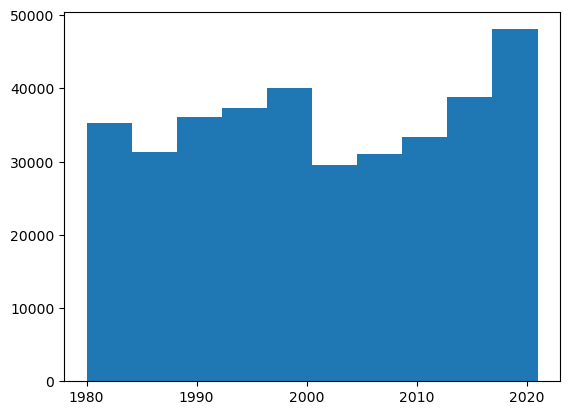

In [97]:
import matplotlib.pyplot as plt

plt.hist(new_df["year"])

# To do:
# Artist Genre and Langauge of Artist to be added.